In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns 
import scipy.stats
from scipy.linalg import solve
from sklearn import linear_model, metrics
from scipy.stats import linregress


In [39]:
import warnings
warnings.filterwarnings('ignore')

In [40]:
def build_matrix(df):
    A = np.zeros([100, 10])
    for position, (index, row) in enumerate(df.iterrows()):
        pep_1_index = pep_to_index[row["peptide 1 (read 1)"]]
        pep_2_index = pep_to_index[row["peptide 2 (read 2)"]]
        if pep_2_index == pep_1_index:
            A[position][pep_2_index] = 2
        else:
            A[position][pep_1_index] = 1
            A[position][pep_2_index] = 1
    return A

def build_result_vector(df, col_name):
    return np.asarray(df[col_name].values)


In [41]:
# regr = linear_model.LinearRegression()
# regr.fit(A, b)

Ks_2sampResult(statistic=0.12222222222222222, pvalue=0.7180742119445244)
Ks_2sampResult(statistic=0.06666666666666667, pvalue=0.895840760849933)
Ks_2sampResult(statistic=0.0, pvalue=1.0)
Ks_2sampResult(statistic=0.044444444444444446, pvalue=0.9420065774695597)
Ks_2sampResult(statistic=0.07777777777777778, pvalue=0.8672059184719078)
Ks_2sampResult(statistic=0.03333333333333333, pvalue=0.9603054729281938)
Ks_2sampResult(statistic=0.08888888888888889, pvalue=0.8342977641573659)
Ks_2sampResult(statistic=0.08888888888888889, pvalue=0.8342977641573659)
Ks_2sampResult(statistic=0.0, pvalue=1.0)
Ks_2sampResult(statistic=0.08888888888888889, pvalue=0.8342977641573659)
Ks_2sampResult(statistic=0.5444444444444444, pvalue=0.002854462604573326)
Ks_2sampResult(statistic=0.7666666666666667, pvalue=3.7627446906079385e-06)


Text(0, 0.5, 'Observed norm_fracPE')

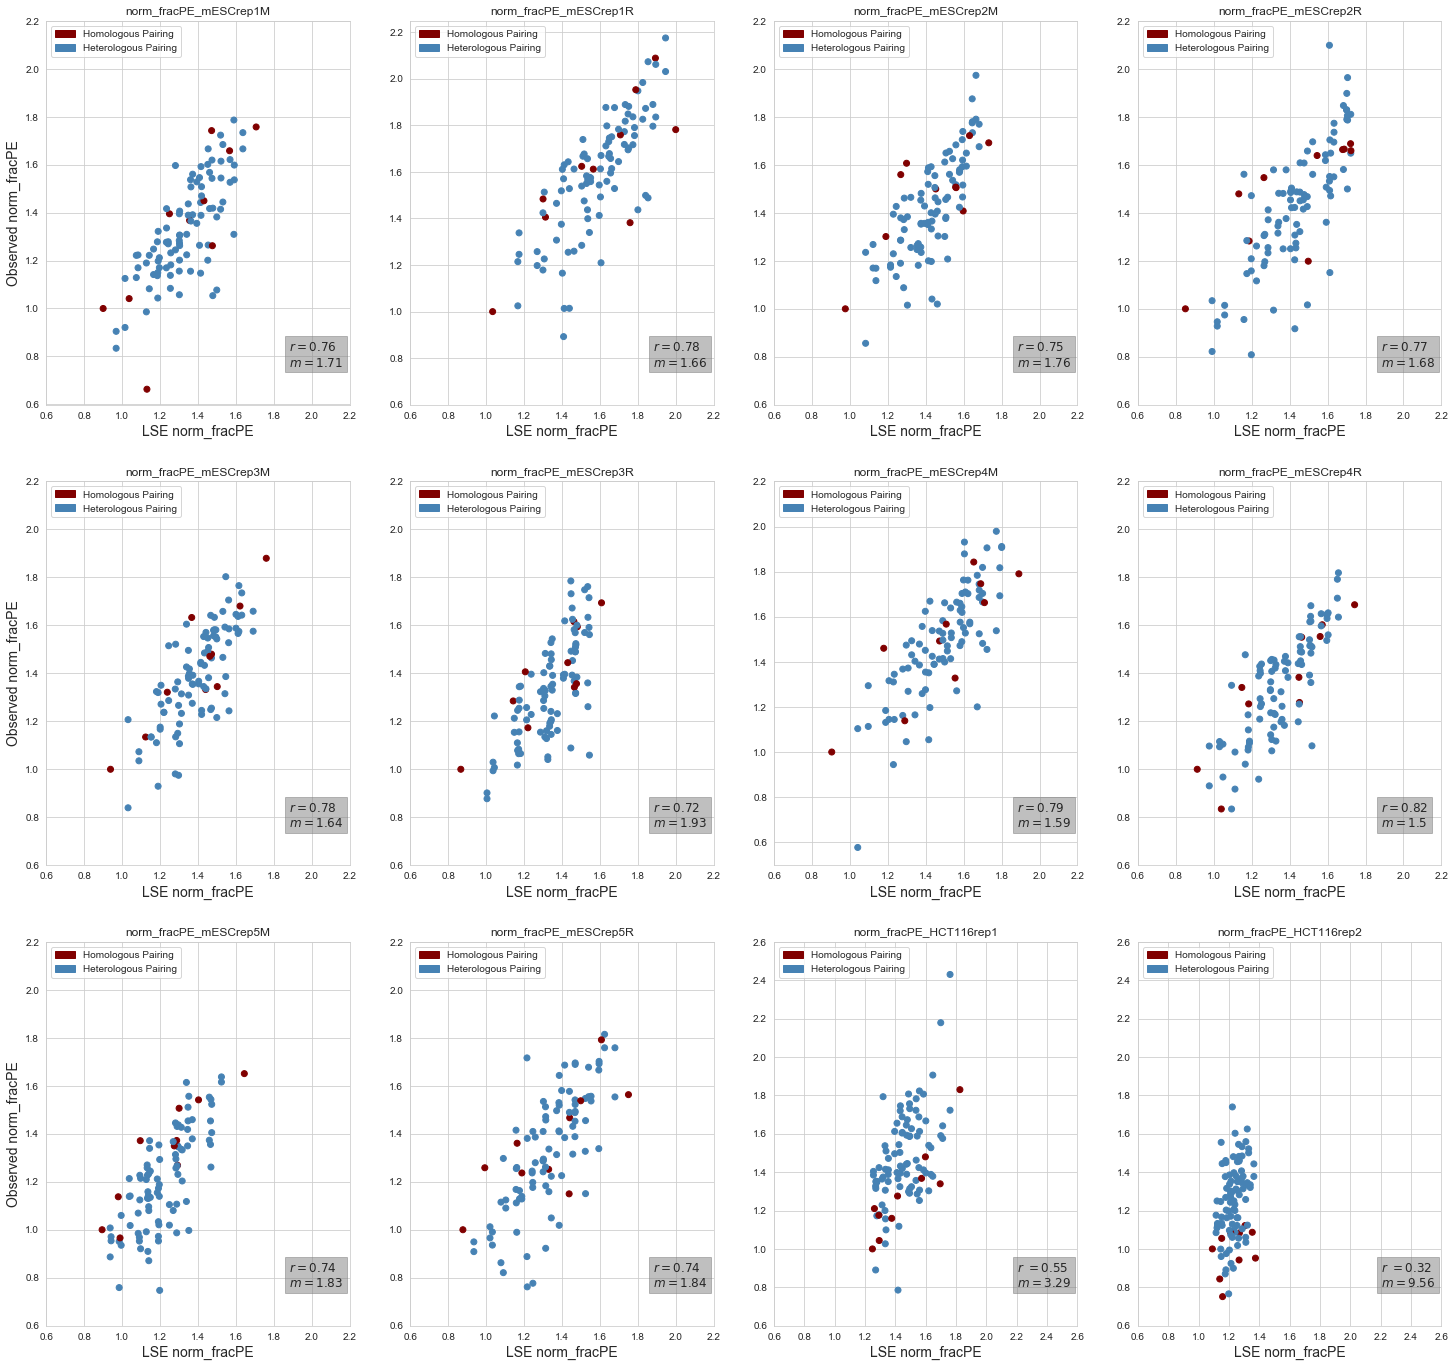

In [42]:
rep_to_LSE_vector = {}

df = pd.read_excel("120920_PE_dual_peptide_analysis.xlsx", sheet_name = 1)

peptides = sorted(set(df["peptide 1 (read 1)"]).union(set(df["peptide 2 (read 2)"])))
pep_to_index = {}
position = 0 
for p in peptides:
    pep_to_index[p] = position
    position += 1

columns_sheet_1 = ["norm_fracPE_mESCrep1M", "norm_fracPE_mESCrep1R", "norm_fracPE_mESCrep2M", 
                   "norm_fracPE_mESCrep2R", "norm_fracPE_mESCrep3M", "norm_fracPE_mESCrep3R", 
                   "norm_fracPE_mESCrep4M", "norm_fracPE_mESCrep4R", "norm_fracPE_mESCrep5M", 
                   "norm_fracPE_mESCrep5R"]

sns.set_style("whitegrid")
fig, ((ax1, ax2, ax3 ,ax4), 
      (ax5, ax6, ax7, ax8), 
      (ax9 ,ax10, ax11, ax12)) = plt.subplots(3, 4, figsize = (25, 24))

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 ,ax10]




rep_to_fracs = {}

for ax, column in zip(axes, columns_sheet_1):
    heterologs = []
    homologs = [] 
    A = build_matrix(df)
    b = build_result_vector(df, column)
    colors = []
    is_homolog = []
    for row in A:
        if np.max(row) == 2:
            colors.append("maroon")
            is_homolog.append(True)
        else:
            colors.append("steelblue")
            is_homolog.append(False)
            
    
    left_inverse = np.linalg.lstsq(A, b)
    res = np.matmul(A, left_inverse[0])
    rep_to_LSE_vector[column] = left_inverse[0]
    fracs = np.divide(res, b)
    rep_to_fracs[column] = fracs
    
    for value, is_hom in zip(fracs, is_homolog):
        if is_hom:
            homologs.append(value)
        else:
            heterologs.append(value)
            
    print(scipy.stats.ks_2samp(homologs, heterologs, alternative = "less"))
    
    slope, intercept, r_value, p_value, std_err = linregress(b, res)
    ax.scatter(res, b, c = colors)
    ax.set_title(column)
    ax.set_yticks(np.arange(0.6, 2.4, 0.2))
    ax.set_xticks(np.arange(0.6, 2.4, 0.2))
    ax.set_xlabel("LSE norm_fracPE", fontsize = 14)
    
    
    red_patch = mpatches.Patch(color='maroon', label='Homologous Pairing')
    blue_patch = mpatches.Patch(color='steelblue', label='Heterologous Pairing')
    
    ax.legend(handles=[red_patch, blue_patch], loc = "upper left")
    
    text = f"$r = {round(r_value, 2)}$\n$m = {round(1/slope, 2)}$"
    t = ax.text(.8, .1, text, transform= ax.transAxes, fontsize=12)
    t.set_bbox(dict(facecolor='gray', alpha=0.5, edgecolor='gray'))


df = pd.read_excel("120920_PE_dual_peptide_analysis.xlsx", sheet_name = 2)

peptides = sorted(set(df["peptide 1 (read 1)"]).union(set(df["peptide 2 (read 2)"])))
pep_to_index = {}
position = 0 
for p in peptides:
    pep_to_index[p] = position
    position += 1

columns_sheet_2 = ["norm_fracPE_HCT116rep1", "norm_fracPE_HCT116rep2"]

sns.set_style("whitegrid")

axes = [ax11, ax12]

for ax, column in zip(axes, columns_sheet_2):
    A = build_matrix(df)
    b = build_result_vector(df, column)
    colors = []
    heterologs = []
    homologs = [] 
    is_homolog = []
    for row in A:
        if np.max(row) == 2:
            colors.append("maroon")
            is_homolog.append(True)
        else:
            colors.append("steelblue")
            is_homolog.append(False)
            
    left_inverse = np.linalg.lstsq(A,b)
    # predictions are res
    
    res = np.matmul(A, left_inverse[0])
    rep_to_LSE_vector[column] = left_inverse[0]
    
    fracs = np.divide(res, b)
    rep_to_fracs[column] = fracs
    
    for value, is_hom in zip(fracs, is_homolog):
        if is_hom:
            homologs.append(value)
        else:
            heterologs.append(value)
            
    print(scipy.stats.ks_2samp(homologs, heterologs, alternative = "less"))
    
    slope, intercept, r_value, p_value, std_err = linregress(b, res)
    lr = linregress(res, b)
    ax.scatter(res, b, c = colors)
    ax.set_xlabel("LSE norm_fracPE", fontsize = 14)
    ax.set_title(column)
    ax.set_yticks(np.arange(0.6, 2.8, 0.2))
    ax.set_xticks(np.arange(0.6, 2.8, 0.2))
    red_patch = mpatches.Patch(color='maroon', label='Homologous Pairing')
    blue_patch = mpatches.Patch(color='steelblue', label='Heterologous Pairing')
    
    ax.legend(handles=[red_patch, blue_patch], loc = "upper left")
    text = f"$r \ = {round(r_value, 2)}$\n$m = {round(1/slope, 2)}$"
    t = ax.text(.8, .1, text, transform= ax.transAxes, fontsize=12)
    t.set_bbox(dict(facecolor='gray', alpha=0.5, edgecolor='gray'))
    
ax1.set_ylabel("Observed norm_fracPE", fontsize = 14)
ax5.set_ylabel("Observed norm_fracPE", fontsize = 14)
ax9.set_ylabel("Observed norm_fracPE", fontsize = 14)

(0.9236221463955926, 1.337376356470452e-42)
10 90
Ks_2sampResult(statistic=0.3111111111111111, pvalue=0.29865524992360315)


Text(0.5, 0, 'Expected Editing Under \n Linear Model Assumptions')

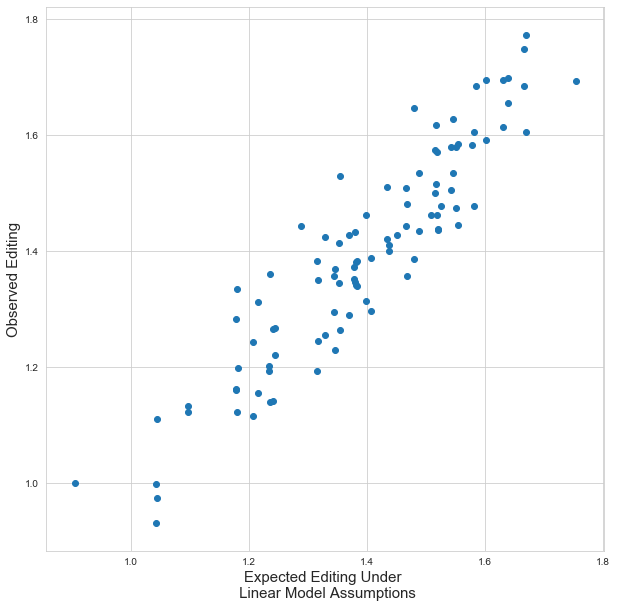

In [46]:

df = pd.read_excel("120920_PE_dual_peptide_analysis.xlsx", sheet_name = 1)

peptides = sorted(set(df["peptide 1 (read 1)"]).union(set(df["peptide 2 (read 2)"])))
pep_to_index = {}
position = 0 
for p in peptides:
    pep_to_index[p] = position
    position += 1

columns_sheet_1 = ["norm_fracPE_mESCrep1M", "norm_fracPE_mESCrep1R", "norm_fracPE_mESCrep2M", 
                   "norm_fracPE_mESCrep2R", "norm_fracPE_mESCrep3M", "norm_fracPE_mESCrep3R", 
                   "norm_fracPE_mESCrep4M", "norm_fracPE_mESCrep4R", "norm_fracPE_mESCrep5M", 
                   "norm_fracPE_mESCrep5R"]


peptides = sorted(set(df["peptide 1 (read 1)"]).union(set(df["peptide 2 (read 2)"])))
pep_to_index = {}
position = 0 
for p in peptides:
    pep_to_index[p] = position
    position += 1
    
A = build_matrix(df)
b = []
names = []
for index, row in df.iterrows():
    names.append(row["peptide 1 (read 1)"] + "_" + row["peptide 2 (read 2)"])
    b.append(np.median(row[columns_sheet_1].values))

left_inverse = np.linalg.lstsq(A, b)
res = np.matmul(A, left_inverse[0])

LSE_vector = left_inverse[0]

print(scipy.stats.pearsonr(res, b))

division_vals = np.divide(res, b)

is_homolog = []

homologs = []
heterologs = []

for row in A:
    if np.max(row) == 2:
        is_homolog.append(True)
    else:
        is_homolog.append(False)
        
for is_hom, v in zip(is_homolog, division_vals):
    if is_hom:
        homologs.append(v)
    else:
        heterologs.append(v)
        
print(len(homologs), len(heterologs))
print(scipy.stats.ks_2samp(homologs, heterologs))
            

    
df = pd.DataFrame()
df["name"] = names
df["median_FC"] = b
df["Linear Model prediction"] = res


fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(res, b)
ax.set_ylabel("Observed Editing", fontsize = 15)
ax.set_xlabel("Expected Editing Under \n Linear Model Assumptions", fontsize = 15)



In [45]:
df.to_csv("linear_model_estimates_120920_PE_dual.csv", index = False)

In [48]:
xlabels = list(pep_to_index.keys())
# ylables = []
# data = []
with open("linear_model_weights_PE_dual.txt", "w") as f:
    f.write("weight, peptide\n")
    for val,pep in zip(LSE_vector, pep_to_index.keys()):
        f.write(f"{round(val, 4)}, {pep}\n")
f.close()
#     data.append(v)
#     ylables.append(k)

In [16]:
heterologs = []
homologs = []

df = pd.read_excel("120920_PE_dual_peptide_analysis.xlsx", sheet_name = 1)

A = build_matrix(df)
is_homolog = []
for row in A:
    if np.max(row) == 2:
        is_homolog.append(True)
    else:
        is_homolog.append(False)

    
            

scipy.stats.mannwhitneyu(homologs, heterologs)    

MannwhitneyuResult(statistic=36228.0, pvalue=0.0006840481655040685)

Text(0.5, 1, 'Peptide Contribution to Linear LSE Solution')

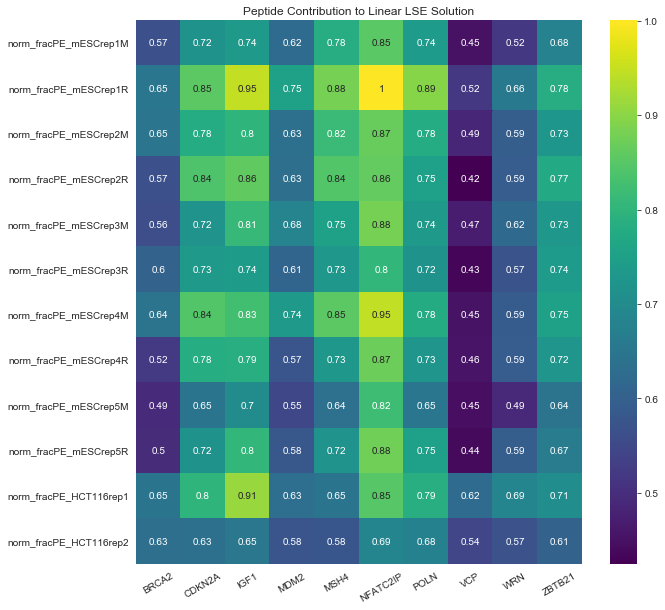

In [6]:
fig, ax = plt.subplots(figsize = (10, 10))
xlabels = list(pep_to_index.keys())
ylables = []
data = []
for k,v in rep_to_LSE_vector.items():
    data.append(v)
    ylables.append(k)


sns.heatmap(data, ax = ax, annot = True, cmap = "viridis")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xticklabels(xlabels, rotation = 30)
ax.set_yticklabels(ylables, rotation = 0)
ax.set_title("Peptide Contribution to Linear LSE Solution")

In [174]:
rep_to_LSE_vector

{'norm_fracPE_mESCrep1M': array([0.56533594, 0.7157934 , 0.73598089, 0.6247594 , 0.78339082,
        0.8534639 , 0.73805174, 0.44986164, 0.51841339, 0.67790092]),
 'norm_fracPE_mESCrep1R': array([0.65030384, 0.85430843, 0.94674314, 0.7522334 , 0.8798747 ,
        1.00029818, 0.89493089, 0.51731771, 0.65671075, 0.78284097]),
 'norm_fracPE_mESCrep2M': array([0.64921817, 0.77877791, 0.79861235, 0.63394573, 0.81533672,
        0.86606916, 0.7799904 , 0.4877185 , 0.59471508, 0.72629134]),
 'norm_fracPE_mESCrep2R': array([0.56565338, 0.83962913, 0.86059089, 0.6319861 , 0.8437984 ,
        0.86153918, 0.74891558, 0.42482053, 0.59292294, 0.77225616]),
 'norm_fracPE_mESCrep3M': array([0.56189164, 0.72032022, 0.81091763, 0.68350526, 0.75085045,
        0.88017211, 0.73574814, 0.46928486, 0.61908499, 0.73130717]),
 'norm_fracPE_mESCrep3R': array([0.60350408, 0.73298526, 0.74071603, 0.61042115, 0.73177807,
        0.80456364, 0.71548397, 0.43340169, 0.57158842, 0.7385874 ]),
 'norm_fracPE_mESCrep4

norm_fracPE_mESCrep5R 0.5515636003505933 3.2870688772523367
norm_fracPE_mESCrep5R 0.32346996070460854 9.557231117497322


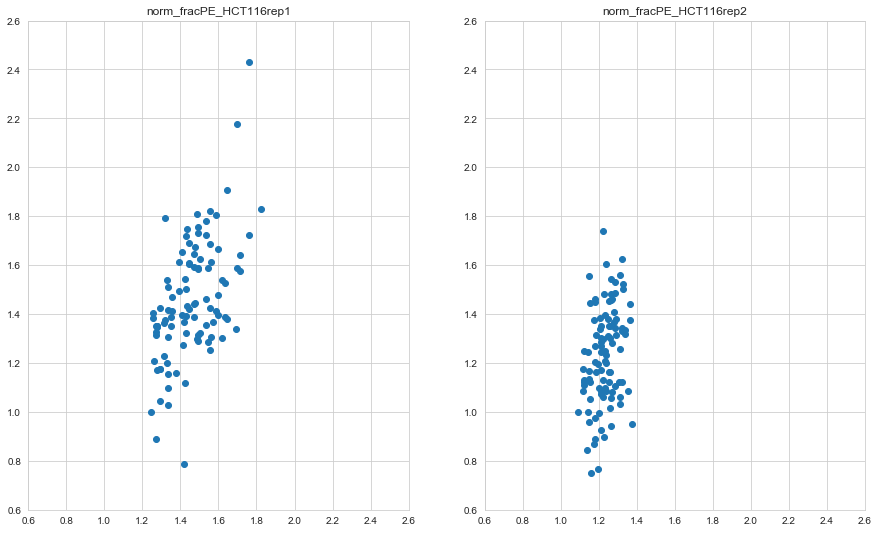

In [142]:
df = pd.read_excel("120920_PE_dual_peptide_analysis.xlsx", sheet_name = 2)

peptides = sorted(set(df["peptide 1 (read 1)"]).union(set(df["peptide 2 (read 2)"])))
pep_to_index = {}
position = 0 
for p in peptides:
    pep_to_index[p] = position
    position += 1

    
columns_sheet_2 = ["norm_fracPE_HCT116rep1", "norm_fracPE_HCT116rep2"]


sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 9))

axes = [ax1, ax2]

for ax, column in zip(axes, columns_sheet_2):
    A = build_matrix(df)
    b = build_result_vector(df, column)
    left_inverse = np.linalg.lstsq(A,b)
    # predictions are res
    res = np.matmul(A, left_inverse[0])
    slope, intercept, r_value, p_value, std_err = linregress(b, res)
    lr = linregress(res, b)
    ax.scatter(res, b)
    ax.set_title(column)
    ax.set_yticks(np.arange(0.6, 2.8, 0.2))
    ax.set_xticks(np.arange(0.6, 2.8, 0.2))
    print(c, r_value, 1 / slope)

In [106]:
pep_to_index

{'BRCA2': 0,
 'CDKN2A': 1,
 'IGF1': 2,
 'MDM2': 3,
 'MSH4': 4,
 'NFATC2IP': 5,
 'POLN': 6,
 'VCP': 7,
 'WRN': 8,
 'ZBTB21': 9}

In [62]:
metrics.mean_squared_error(c, b)

0.004960060770399777